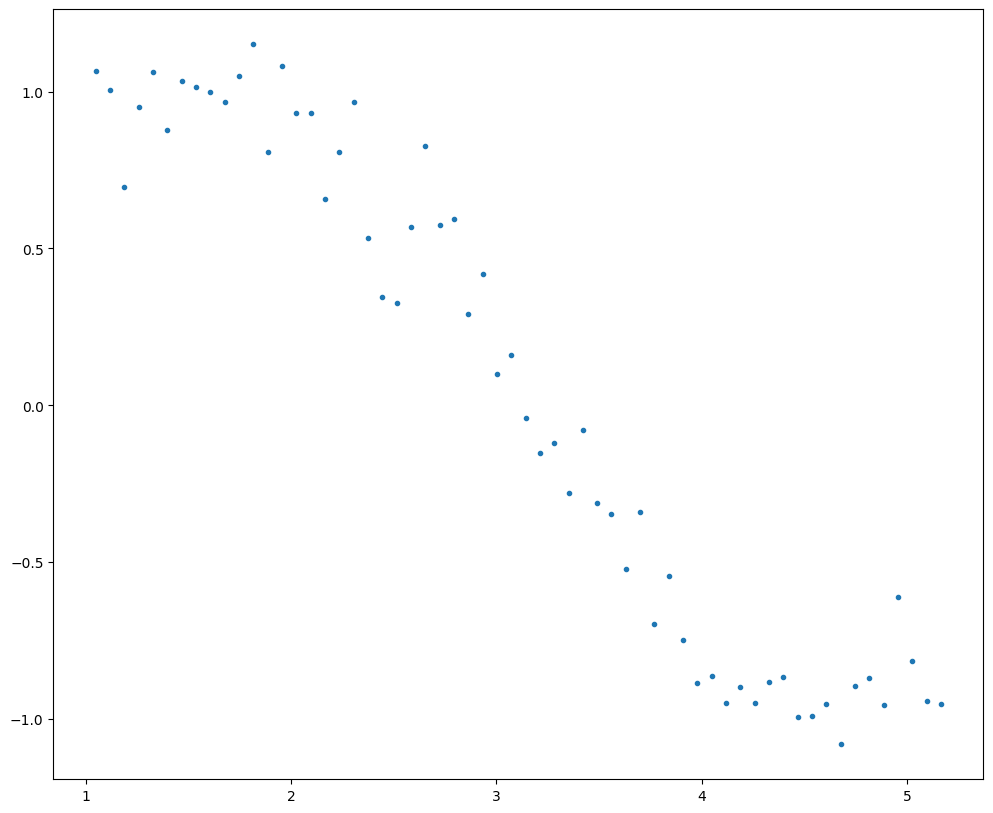

In [ ]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.show()

We’ll use this as an example to test different scenarios in this article. Let’s try to estimate the sine function using polynomial regression with powers of x from 1 to 15. Let’s add a column for each power upto 15 in our dataframe. This can be accomplished using the following code:


In [ ]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

    x    y  x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10  x_11  x_12  x_13  \
0   1  1.1  1.1  1.1  1.2  1.3  1.3  1.4  1.4  1.5   1.6   1.7   1.7   1.8   
1 1.1    1  1.2  1.4  1.6  1.7  1.9  2.2  2.4  2.7     3   3.4   3.8   4.2   
2 1.2  0.7  1.4  1.7    2  2.4  2.8  3.3  3.9  4.7   5.5   6.6   7.8   9.3   
3 1.3 0.95  1.6    2  2.5  3.1  3.9  4.9  6.2  7.8   9.8    12    16    19   
4 1.3  1.1  1.8  2.3  3.1  4.1  5.4  7.2  9.6   13    17    22    30    39   

   x_14  x_15  
0   1.9     2  
1   4.7   5.3  
2    11    13  
3    24    31  
4    52    69  


Now that we have all the 15 powers, let’s make 15 different linear regression models, with each model containing variables with powers of x from 1 to the particular model number. For example, the feature set of model 8 will be – {x, x_2, x_3, …, x_8}.

First, we’ll define a generic function that takes in the required maximum power of x as an input and returns a list containing – [ model RSS, intercept, coef_x, coef_x2, … upto entered power ]. Here RSS refers to the ‘Residual Sum of Squares,’ which is nothing but the sum of squares of errors between the predicted and actual values in the training data set and is known as the cost function or the loss function.

In [ ]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])

    #Fit the model
    linreg = LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])

    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

Store all the Results in Pandas Dataframe
Now, we can make all 15 models and compare the results. For ease of analysis, we’ll store all the results in a Pandas dataframe and plot 6 models to get an idea of the trend.

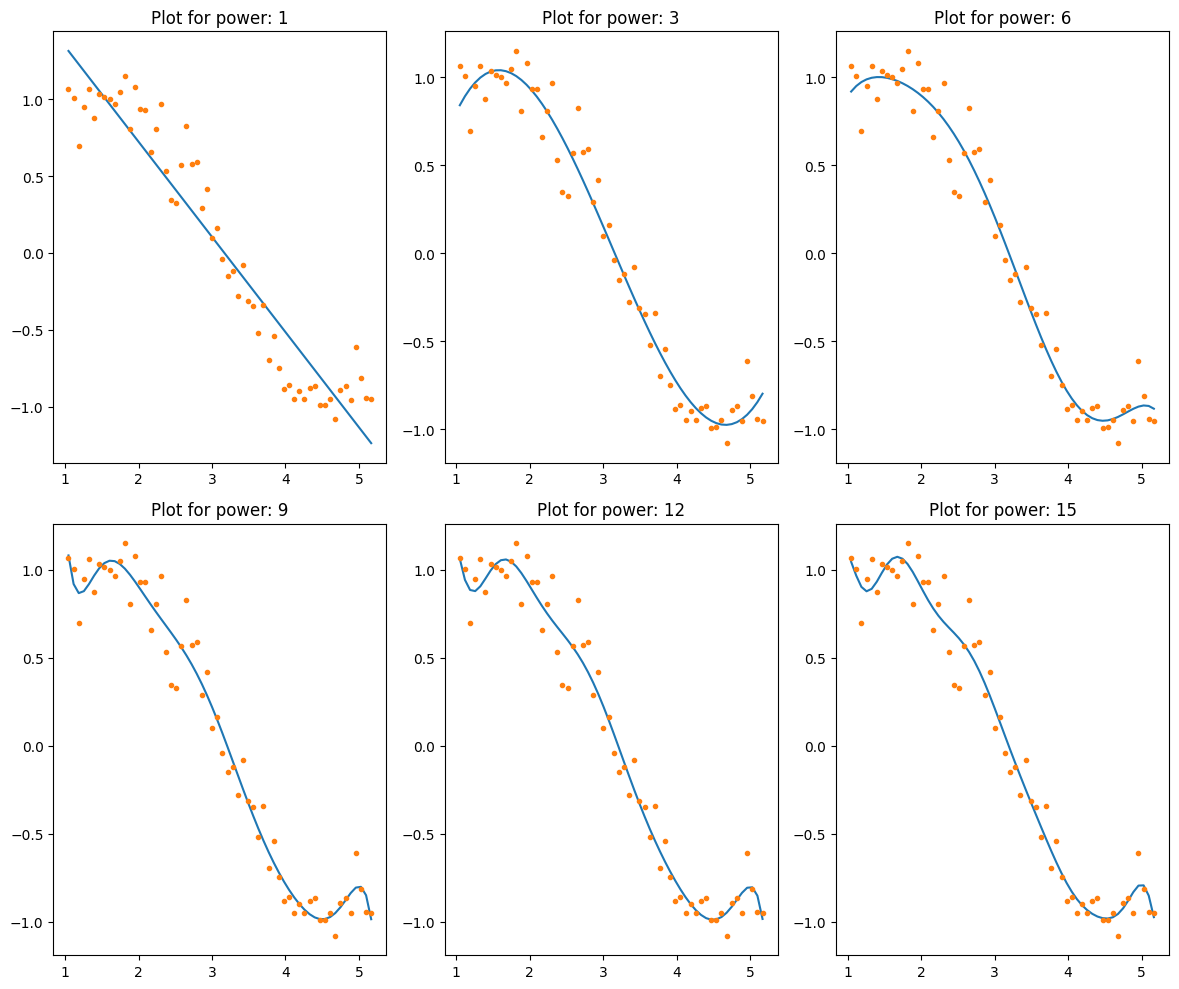

In [ ]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


It is clearly evident that the size of coefficients increases exponentially with an increase in model complexity.What does a large coefficient signify? It means that we’re putting a lot of emphasis on that feature, i.e., the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modeling intricate relations to estimate the output and ends up overfitting the particular training data.

In [ ]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

Note the ‘Ridge’ function used here. It takes ‘alpha’ as a parameter on initialization. Also, keep in mind that normalizing the inputs is generally a good idea in every type of regression and should be used in the case of ridge regression as well.

Now, let’s analyze the result of Ridge regression for 10 different values of α ranging from 1e-15 to 20. These values have been chosen so that we can easily analyze the trend with changes in values of α. These would, however, differ from case to case.

Note that each of these 10 models will contain all the 15 variables, and only the value of alpha would differ. This differs from the simple linear regression case, where each model had a subset of features.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.04792e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.41282e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.89039e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.69428e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

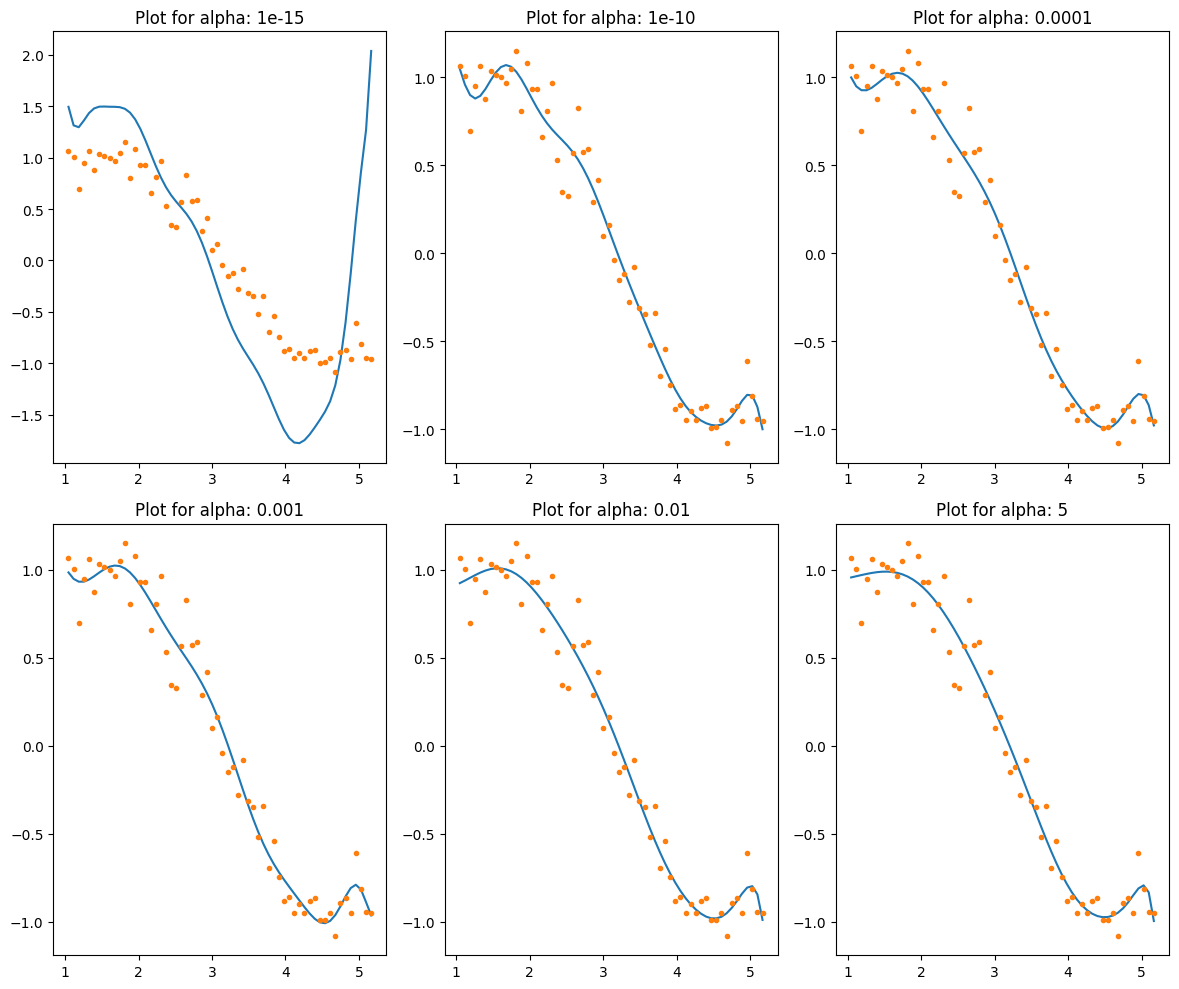

In [ ]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

Here we can clearly observe that as the value of alpha increases, the model complexity reduces. Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well (e.g., alpha = 5). Thus alpha should be chosen wisely. A widely accepted technique is cross-validation, i.e., the value of alpha is iterated over a range of values, and the one giving a higher cross-validation score is chosen.

This straight away gives us the following inferences:

The RSS increases with an increase in alpha.
An alpha value as small as 1e-15 gives us a significant reduction in the magnitude of coefficients. How? Compare the coefficients in the first row of this table to the last row of the simple linear regression table.
High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1
Though the coefficients are really small, they are NOT zero.
The first 3 are very intuitive. But #4 is also a crucial observation. Let’s reconfirm the same by determining the number of zeros in each row of the coefficients data set:


In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,33,-2.8e+04,1.9e+05,-5.9e+05,1.1e+06,-1.4e+06,1.3e+06,-8.4e+05,4.2e+05,-1.6e+05,4.6e+04,-1e+04,1.6e+03,-1.9e+02,15,-0.71,0.016
alpha_1e-10,0.85,75,-6.5e+02,2e+03,-2.8e+03,1.1e+03,2e+03,-3.8e+03,3.3e+03,-1.8e+03,6.9e+02,-1.9e+02,36,-4.8,0.43,-0.023,0.00055
alpha_1e-08,0.87,-5.8,65,-1.1e+02,-9.5,1.3e+02,-49,-1.2e+02,1.8e+02,-1.2e+02,49,-13,2.5,-0.32,0.026,-0.0013,2.6e-05
alpha_0.0001,0.89,6.3,-5.9,-3.3,2.2,4,0.019,-3.6,-0.14,3.4,-2.8,1.1,-0.28,0.044,-0.0042,0.00022,-5e-06
alpha_0.001,0.91,3.4,-1.8,-1.9,-0.5,1.5,2,-0.48,-3.8,4.1,-1.9,0.39,-0.0083,-0.015,0.0034,-0.00033,1.2e-05
alpha_0.01,0.93,1.1,-0.27,-0.18,0.11,0.3,0.13,-0.26,-0.22,0.4,-0.22,0.055,-0.0046,-0.0009,0.00028,-2.8e-05,1e-06
alpha_1,0.94,0.87,0.0072,0.018,0.027,0.027,0.012,-0.01,-0.02,-0.0024,0.017,-0.0082,0.00095,0.00034,-0.00013,1.6e-05,-7.3e-07
alpha_5,0.95,0.92,0.0036,0.0083,0.013,0.014,0.0095,-2.1e-05,-0.0087,-0.0072,0.0041,0.0051,-0.0049,0.0018,-0.00033,3.2e-05,-1.3e-06
alpha_10,0.95,0.93,0.0026,0.0061,0.0093,0.011,0.0078,0.00065,-0.0067,-0.0065,0.003,0.0047,-0.0042,0.0015,-0.00028,2.7e-05,-1e-06
alpha_20,0.95,0.95,0.0017,0.0041,0.0064,0.0075,0.006,0.0013,-0.0044,-0.0056,0.00087,0.0054,-0.0041,0.0014,-0.00025,2.4e-05,-9.1e-07


In [ ]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)
# This confirms that all 15 coefficients are greater than zero in magnitude (can be +ve or -ve). Remember this observation and have a look again until it’s clear. This will play an important role later while comparing ridge with lasso regression

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

In [ ]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha, max_iter=15)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

Notice the additional parameters defined in the Lasso function – ‘max_iter. ‘ This is the maximum number of iterations for which we want the model to run if it doesn’t converge before. This exists for Ridge as well, but setting this to a higher than default value was required in this case. Why?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+00, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+00, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+00, tolerance: 3.695e

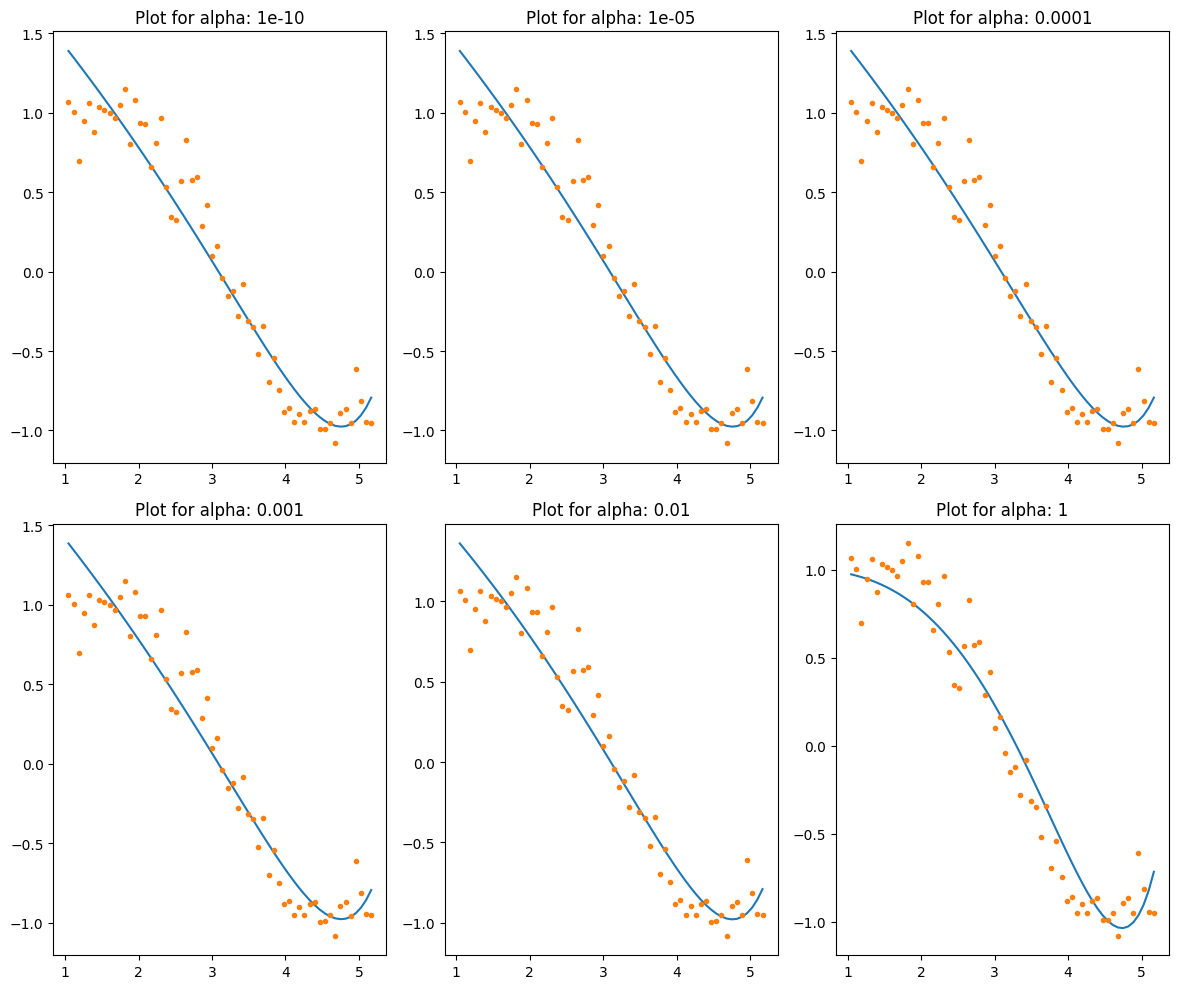

In [ ]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

Apart from the expected inference of higher RSS for higher alphas, we can see the following:

For the same values of alpha, the coefficients of lasso regression are much smaller than that of ridge regression (compare row 1 of the 2 tables).
For the same alpha, lasso has higher RSS (poorer fit) as compared to ridge regression.
Many of the coefficients are zero, even for very small values of alpha.

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,2.4,2,-0.53,-0.029,-0.0025,-0.00012,1.6e-05,6.9e-06,1.6e-06,3.2e-07,5.7e-08,9.8e-09,1.6e-09,2.6e-10,4e-11,6.1e-12,8.9e-13
alpha_1e-10,2.4,2,-0.53,-0.029,-0.0025,-0.00012,1.6e-05,6.9e-06,1.6e-06,3.2e-07,5.7e-08,9.8e-09,1.6e-09,2.6e-10,4e-11,6.1e-12,8.9e-13
alpha_1e-08,2.4,2,-0.53,-0.029,-0.0025,-0.00012,1.6e-05,6.9e-06,1.6e-06,3.2e-07,5.7e-08,9.8e-09,1.6e-09,2.6e-10,4e-11,6.1e-12,8.9e-13
alpha_1e-05,2.4,2,-0.53,-0.029,-0.0025,-0.00012,1.6e-05,7e-06,1.6e-06,3.2e-07,5.7e-08,9.8e-09,1.6e-09,2.6e-10,4e-11,6.1e-12,8.9e-13
alpha_0.0001,2.4,2,-0.53,-0.029,-0.0025,-0.00012,1.6e-05,7e-06,1.6e-06,3.2e-07,5.7e-08,9.8e-09,1.6e-09,2.6e-10,4e-11,6.1e-12,8.9e-13
alpha_0.001,2.4,2,-0.52,-0.03,-0.0026,-0.00012,1.7e-05,7e-06,1.6e-06,3.2e-07,5.7e-08,9.8e-09,1.6e-09,2.6e-10,4e-11,6.1e-12,8.9e-13
alpha_0.01,2.2,1.9,-0.46,-0.041,-0.0027,-9.9e-05,2.1e-05,7.7e-06,1.7e-06,3.3e-07,5.9e-08,1e-08,1.6e-09,2.6e-10,4.1e-11,6.1e-12,8.9e-13
alpha_1,1.7,1,-0,-0,-0.029,-0.00059,7.7e-05,2.9e-05,4.5e-06,7e-07,1.1e-07,1.7e-08,2.6e-09,3.9e-10,5.7e-11,8.2e-12,1.1e-12
alpha_5,2.8,0.83,-0,-0,-0.003,-0.0059,-5.8e-05,2.7e-05,7e-06,1e-06,1.6e-07,2.5e-08,3.8e-09,5.7e-10,8.6e-11,1.3e-11,1.8e-12
alpha_10,3,0.8,-0,-0,-0,-0.0057,-0.00029,1.3e-05,8.7e-06,1.2e-06,1.9e-07,2.9e-08,4.4e-09,6.8e-10,1e-10,1.5e-11,2.2e-12


This again tells us that the model complexity decreases with an increase in the values of alpha. But notice the straight line at alpha=1. Appears a bit strange to me. Let’s explore this further by looking at the coefficients:


Apart from the expected inference of higher RSS for higher alphas, we can see the following:

For the same values of alpha, the coefficients of lasso regression are much smaller than that of ridge regression (compare row 1 of the 2 tables).
For the same alpha, lasso has higher RSS (poorer fit) as compared to ridge regression.
Many of the coefficients are zero, even for very small values of alpha

In [ ]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)


alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_1e-05     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         2
alpha_5         2
alpha_10        3
dtype: int64

We can observe that even for a small value of alpha, a significant number of coefficients are zero. This also explains the horizontal line fit for alpha=1 in the lasso plots; it’s just a baseline model! This phenomenon of most of the coefficients being zero is called ‘sparsity. ‘ Although lasso performs feature selection, this level of sparsity is achieved in special cases only, which we’ll discuss towards the end.